In [31]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
def age_group(age: int):
    if age == 18:
        return "18"
    elif 18 < age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"
    return None


data = pd.read_csv("dateset/nyt/nyt1.csv")
data_filter_noNullAge = data[data.Age > 0]
data_filter_noNullAge.insert(1, "AG", [age_group(age) for age in data_filter_noNullAge.Age.to_list()])
data_by_gender_age = data_filter_noNullAge.groupby(["AG", "Gender"],as_index=False).sum()
data_by_signedIn_age = data_filter_noNullAge.groupby(["AG"],as_index=False).sum()

,AG,Age,Gender,Impressions,Clicks,Signed_In
0,18,97632,2892,27001,458,5424
1,18-24,750159,18829,176584,1709,35270
2,25-34,1716328,30958,290511,2937,58174
3,35-44,2798593,37676,355824,3662,70860
4,45-54,3181779,34007,322109,3232,64288
5,55-64,2661830,23988,224688,4556,44738
6,65+,2098644,10445,144120,4350,28753


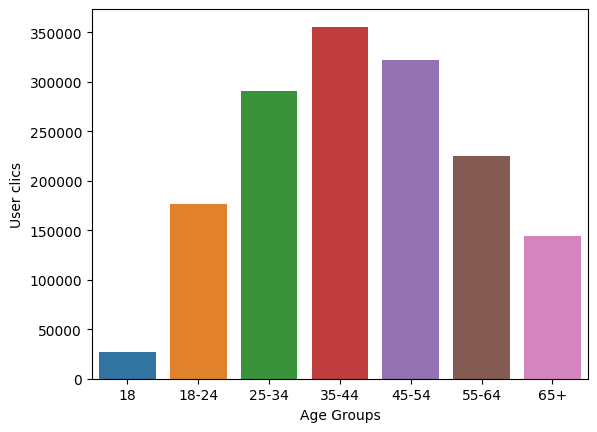

In [32]:
ax=sns.barplot(data=data_by_signedIn_age, 
            x=data_by_signedIn_age.AG, 
            y=data_by_signedIn_age.Impressions)
ax.set(xlabel='Age Groups',ylabel='User clics')
data_by_signedIn_age

,AG,Gender,Age,Impressions,Clicks,Signed_In
0,18,0,45576,12683,205,2532
2,18-24,0,349689,82374,797,16441
4,25-34,0,802877,136292,1388,27216
6,35-44,0,1310798,166324,1707,33184
8,45-54,0,1498737,151650,1542,30281
10,55-64,0,1235139,104220,2105,20750
12,65+,0,1337551,91956,2765,18308
1,18,1,52056,14318,253,2892
3,18-24,1,400470,94210,912,18829
5,25-34,1,913451,154219,1549,30958


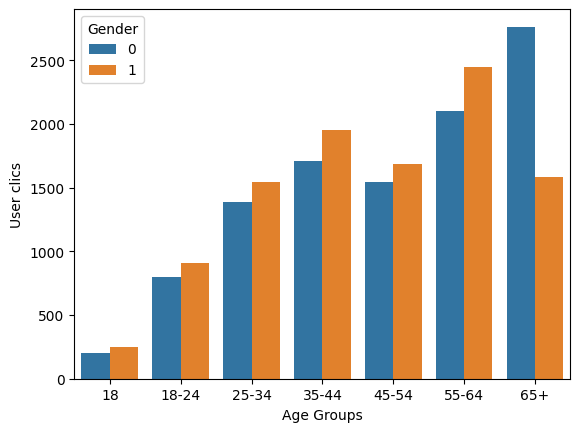

In [44]:
ax=sns.barplot(data=data_by_gender_age, 
            x=data_by_gender_age.AG, 
            y=data_by_gender_age.Clicks,
            hue=data_by_gender_age.Gender)
ax.set(xlabel='Age Groups',ylabel='User clics')
data_by_gender_age.sort_values(['Gender'])

In [4]:
Age_valueGroup=["18","18-24","25-34","35-44","45-54","55-64","65+"]
[data_filter_noNullAge[data_filter_noNullAge.AG==value].Impressions.mean() for value in Age_valueGroup]

[4.978060471976401,
 5.006634533597959,
 4.993828858252828,
 5.021507197290432,
 5.010406296665008,
 5.022307657919442,
 5.012346537752582]

In [46]:
def getResultForQuery(search: str, age_category: str, gender = 2):
    gender = 1 if gender == 'woman' else 0
    dict_1 = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
    days = ["Вівторок", "Середа", "Четверг", "П'ятниця", "Субота", "Неділя", "Понеділок"]
    for i in range(0, 31):
        data = pd.read_csv("dateset/nyt/nyt" + str(i + 1) + ".csv")
        data_no_null_age = data[data.Age > 0]
        data_no_null_age.insert(1, "Age_Group", [age_group(age) for age in data_no_null_age.Age.to_list()])
        dict_1[i % 7] += \
            data_no_null_age[(data_no_null_age.Gender == gender) & (data_no_null_age.Age_Group == age_category)][
                search].count() if gender != 2 else data_no_null_age[data_no_null_age.Age_Group == age_category][
                search].count()
    for key, value in dict_1.items():
        print("{0} -> {1}".format(days[key % 7], value))

In [6]:
getResultForQuery("Signed_In", "18",1)

Вівторок -> 12128
Середа -> 11956
Четверг -> 12657
П'ятниця -> 9818
Субота -> 8502
Неділя -> 16358
Понеділок -> 9832


0    137106
1    321335
Name: Clicks, dtype: int64

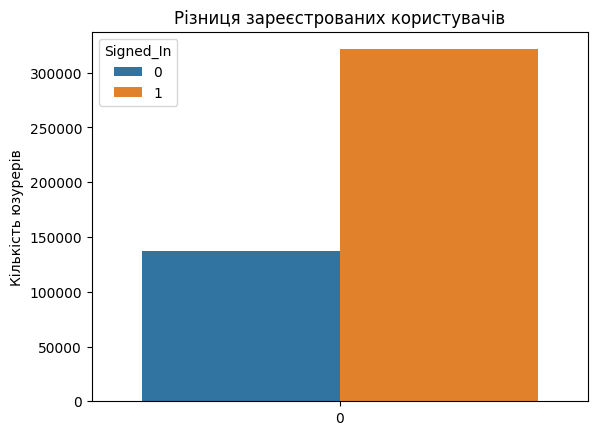

In [48]:
data = pd.read_csv("dateset/nyt/nyt1.csv")
data_by_gender_signedIn = data.groupby(["Signed_In"],as_index=False).count()
ax=sns.barplot(data=data_by_gender_signedIn, 
            x=[0,0], 
            y=data_by_gender_signedIn.Clicks,
            hue=data_by_gender_signedIn.Signed_In)
ax.set(ylabel='Кількість юзурерів',title='Різниця зареєстрованих користувачів')
data_by_gender_signedIn.Clicks

In [ ]:
Пройшлись по місяцю Травень 2012 року, який починається з вівторка

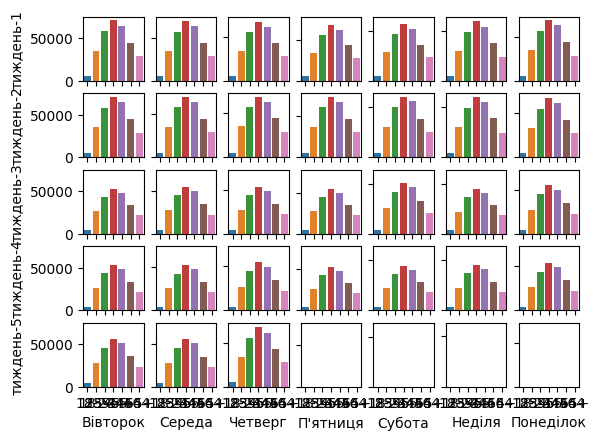

In [65]:
fig, axs = plt.subplots(5, 7, sharey='col', sharex='row')
days = ["Вівторок", "Середа", "Четверг", "П'ятниця", "Субота", "Неділя", "Понеділок"]
for i in range(0, 31):
    try:
        data = pd.read_csv("dateset/nyt/nyt" + str(i + 1) + ".csv")
        data_no_null_age = data[data.Age >= 18]
        data_no_null_age.insert(1, "Age_Group", [age_group(age) for age in data_no_null_age.Age.to_list()])
        data = data_no_null_age.groupby(["Age_Group"], as_index=False).count()
        sns.barplot(ax=axs[i // 7, i % 7], x=data.Age_Group, y=data.Signed_In)
    except FileNotFoundError:
        break

for i, ax in enumerate(axs.flat):
    # ax.get_xaxis().set_visible(False)
    ax.set(xlabel=days[i % 7], ylabel='тиждень-' + str(i // 7 + 1))
    ax.label_outer()

plt.show()